In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
#import dmStyle
#dmStyle.customize_mpl()


In [3]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import math

###Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{1, 2, 3,\dots, k\})$.
Your goal in this assignment is to implement multi-class Logistic Regression classifier. We will be using $1-in-k$ class representation and will be training $k$ classifiers for $k$ different classes. During training we will be representing each example's class label with a binary vector of $k$ dimensions with $j_{th}$ dimension which example will be set to 1. For instance, if an example has a label$=4$ and total number of classes are 6 then it's label during training will be represented by the vector =$[0,0,0,1,0,0]$


Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$.  Now we will be having $k$ such hypothesis, and during testing the label of the hypothesis that gives highest score to a test example will be used as label of the test example.

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack$$

For a multi-class classifier it can be updated as:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} \lbrack -y_j^{(i)} \log(h_{\theta^{(j)}}(x^{(i)})) - (1-y_j^{(i)}) \log(1-h_{\theta^{(j)}}(x^{(i)})) \rbrack$$


Here
$$h_{\theta^{(j)}}(x^{(i)})= \frac{1}{1+\exp(-x^{(i)^T}\theta^{(j)}} $$

For instance, for a two class classifier this cost function will be:


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} \lbrack -y_1^{(i)} \log(h_{\theta^{(1)}}(x^{(i)})) - (1-y_1^{(i)}) \log(1-h_{\theta^{(1)}}(x^{(i)}))-y_2^{(i)} \log(h_{\theta^{(2)}}(x^{(i)})) - (1-y_2^{(i)}) \log(1-h_{\theta^{(2)}}(x^{(i)}))\rbrack$$


Here
$$h_{\theta^{(1)}}(x^{(i)})= \frac{1}{1+\exp(-x^{(i)^T}\theta^{(1)})} $$


The gradient of the above cost function is a vector of the same length as $\theta$ where the $p^{th}$ element (for $p = 0,1,...,q$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_p} = \frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta^{(j)}}(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$

For optimal performance you might be needed to add a regularization term to the cost function. In that case your cost function will be updated to 

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} \lbrack -y_j^{(i)} \log(h_{\theta^{(j)}}(x^{(i)})) - (1-y_j^{(i)}) \log(1-h_{\theta^{(j)}}(x^{(i)})) \rbrack+ \lambda \frac{1}{2}\sum_{i=1}^q \theta_k^2$$

However, note that for this assignment your task is to implement simple multi-class logistic regression without regularization. Afterwards, you can extend it very easily.


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




In [4]:
import time 
def GradientDescent(X,Y,cost_function,derivative_cost_function,nclasses,alpha,maxniter=20000, plotcf=True):
 
    eps=0.00001
    #print X.shape
    nexamples=float(X.shape[0])
    
    thetas=rand(X.shape[1]*nclasses,1)
    print "Alpha : ",alpha
    #print theta_new
    numiter = 0
    theta_old=thetas
    theta_new=thetas+1

    
    
    while numiter < maxniter: 
        theta_old = theta_new
        theta_new = theta_old - alpha * np.array(derivative_cost_function( X, Y ,np.array(theta_old)))
        numiter = numiter + 1
        if(numiter%1000==0):
            print 'Value of Cost Function (obtained in {} iterations) is {}'.format(numiter,cost_function(X,Y,theta_new))
    
    #print 'Value of Cost Function (obtained in {} iterations) at Minimum Points {}, is {}'.format(numiter,theta_new[:,0],cost_function(X,Y,theta_new))
    return np.array(theta_new[:,0])

In [5]:

import pdb
def one_of_k(ilabels):

    classes=np.unique(ilabels)
    
    nclasses=len(classes)
    
    olabels=np.zeros((ilabels.shape[0],nclasses))
    
    for i, l in enumerate(ilabels):        
        olabels[i,classes==l]=1
        
    return olabels

class LogisticRegressionMC:
    ''' Implements the multiclass LogisticRegression For Classification... '''
    def __init__(self,featdim,classes,alpha=0.001,maxniter=20000,scalefeatures=False):        
        self.theta=[] # learned set of parameters 
        self.scalefeatures=scalefeatures
        self.classes=np.unique(classes) # set of classes
        self.nclasses=len(self.classes) # number of classes
        self.featdim=featdim # dimensions of features
        self.alpha=alpha # learning parameter
        self.maxniter=maxniter 
        
        pass
    def sigmoid(self,z):

        z = maximum(minimum(16,z),-16) 
        return 1/(1+np.exp(-z))
    
    
    def hypothesis(self, X):

        X=self.sigmoid(X)
        #h=1/(1+((2.71)**(-X)))
        return X
    
    def cost_function(self, X,Y, theta):

        theta=theta.reshape(self.nclasses,X.shape[1]).T
        cost=0
        cost=np.sum(((-1)*(Y*np.log10(self.hypothesis(X.dot(theta)))))-((1-Y)*np.log10(1-self.hypothesis(X.dot(theta)))))
            
        
        cost/=(len(Y))
        
        return cost
    def derivative_cost_function(self,X,Y,theta):

        partialderivatives=[]
         
        theta=theta.reshape(self.nclasses,X.shape[1]).T
        derivative=(((self.hypothesis(X.dot(theta))-Y).T).dot(X))
        derivative/=len(Y)
        partialderivatives.append(derivative)
        
        partialderivatives=np.array(partialderivatives)
        partialderivatives=partialderivatives.reshape(self.nclasses*X.shape[1],1)
        return partialderivatives

    def train(self, X, Y):

        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        nY=one_of_k(Y) # get a n x k
        self.alpha=0.01
        self.theta=GradientDescent(X,nY,self.cost_function,self.derivative_cost_function,self.nclasses,self.alpha)
     
    def predict(self, X):

        
        num_test = X.shape[0]
        
        #if len(self.theta)-X.shape[1]==1:
            # append 1 at the end of each example for the bias term
            #X=np.hstack((X,np.ones((X.shape[0],1))))
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
       
        Ypred=[]
         
        theta=self.theta.reshape(self.nclasses,X.shape[1]).T
       
        h=self.hypothesis(X.dot(theta))
        pos=np.argmax(h,axis=-1)
        Ypred=self.classes[pos]
        
        return np.array(Ypred).reshape((num_test,1))
    
    
    def scale_features(self,X):

        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)


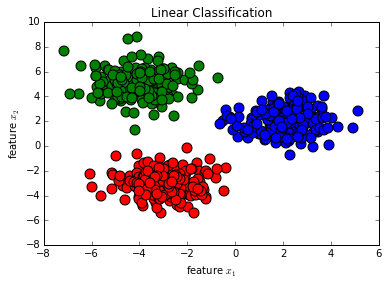

In [6]:
# Create some dummy data for training and testing

np.random.seed(seed=99)

# make some data up using Gaussian distribution...
mean1 = [-3,-3]
mean2 = [2,2]
mean3 = [-4,5]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=600
x1 = np.random.multivariate_normal(mean1,cov,nexamples/3)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/3)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/3)

X=np.vstack((x1,x2,x3))
Y=np.vstack((1*np.ones((nexamples/3,1)),2*np.ones((nexamples/3,1)),3*np.ones((nexamples/3,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='g', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class-lr.svg',format='svg')

In [7]:
print X.shape,Y.shape

(600L, 2L) (600L, 1L)


In [8]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [9]:
print X.shape,Y.shape

(600L, 3L) (600L, 1L)


In [10]:
ook=one_of_k(Y)

In [11]:
ook

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [12]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function,nclasses=1):

    thetas=np.random.rand(X.shape[1]*nclasses,1)
    ad=derivative_cost_function(X,Y,thetas)
    print ad
    eps=0.0001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [13]:
#%pdb
lrclass=LogisticRegressionMC(3,np.unique(Y),alpha=0.01)

In [14]:
# %pdb
test_derivative(X,ook,lrclass.cost_function,lrclass.derivative_cost_function,3)

[[ 0.4833994 ]
 [ 3.12753753]
 [ 0.27849464]
 [-1.35169247]
 [ 1.49203682]
 [ 0.29639842]
 [ 0.96152854]
 [ 0.24940339]
 [ 0.2682777 ]]
diff in direction [[ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.0002]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    

In [15]:
#%pdb off
lrclass.train(X,Y) # c

Alpha :  0.01
Value of Cost Function (obtained in 1000 iterations) is 0.114090891905
Value of Cost Function (obtained in 2000 iterations) is 0.0619399168466
Value of Cost Function (obtained in 3000 iterations) is 0.0444870513023
Value of Cost Function (obtained in 4000 iterations) is 0.0356585021764
Value of Cost Function (obtained in 5000 iterations) is 0.0302743177749
Value of Cost Function (obtained in 6000 iterations) is 0.026620306529
Value of Cost Function (obtained in 7000 iterations) is 0.0239626125551
Value of Cost Function (obtained in 8000 iterations) is 0.0219333732017
Value of Cost Function (obtained in 9000 iterations) is 0.0203272815954
Value of Cost Function (obtained in 10000 iterations) is 0.019020444022
Value of Cost Function (obtained in 11000 iterations) is 0.0179335118388
Value of Cost Function (obtained in 12000 iterations) is 0.017013225079
Value of Cost Function (obtained in 13000 iterations) is 0.0162224519069
Value of Cost Function (obtained in 14000 iteratio

### Let Plots the decision boundaries of the classes, using simple scatter plots... 

Automatic pdb calling has been turned OFF
(10000L, 2L)
[[ 1.]
 [ 3.]
 [ 3.]
 ..., 
 [ 3.]
 [ 3.]
 [ 2.]]
[ 1.  2.  3.]


(-5.4268033365281951, 8.7674908998331276)

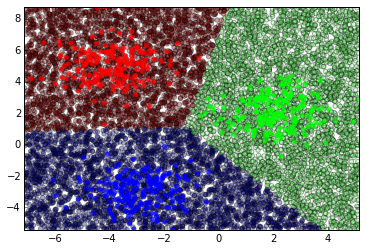

In [16]:
%pdb off
npts=10000
model=lrclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.shape
tx=np.hstack((tx,np.ones((tx.shape[0],1))))
#pdb.set_trace()
cs= model.predict(tx);
print cs
print  np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs.ravel(), alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
              c=list(map(lambda x:'blue' if x==1 else 'lime' if x==2 else 'r',Y)), 
              linewidth=0,s=25,alpha=0.75)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

#Load Iris dataset and test the classifier on them...

In [17]:
#load the data set
data=pd.read_csv('./data/otto-group-classification/train.csv')
print data.describe()

                 id       feat_1        feat_2        feat_3        feat_4  \
count  61878.000000  61878.00000  61878.000000  61878.000000  61878.000000   
mean   30939.500000      0.38668      0.263066      0.901467      0.779081   
std    17862.784315      1.52533      1.252073      2.934818      2.788005   
min        1.000000      0.00000      0.000000      0.000000      0.000000   
25%    15470.250000      0.00000      0.000000      0.000000      0.000000   
50%    30939.500000      0.00000      0.000000      0.000000      0.000000   
75%    46408.750000      0.00000      0.000000      0.000000      0.000000   
max    61878.000000     61.00000     51.000000     64.000000     70.000000   

             feat_5        feat_6        feat_7        feat_8        feat_9  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.071043      0.025696      0.193704      0.662433      1.011296   
std        0.438902      0.215333      1.030102      2.25577

In [18]:
# Get your data in matrix
X=np.asarray(data.ix[:,1:-1].dropna(),dtype=np.float32)
Y=np.asarray(data.ix[:,-1])
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (61878L, 93L)  True Class labels dimensions (61878L,)


In [19]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [20]:
#feat=[2,3,4]
#Y=Y.reshape((len(Y),1))

In [ ]:
#%pdb
lrclass=LogisticRegressionMC(X.shape[1],np.unique(Y),alpha=0.01)
lrclass.train(X,Y)

In [ ]:
datatest=pd.read_csv('./data/otto-group-classification/test.csv')
ids=np.array(datatest['id'])
Xtest=np.array(datatest.ix[:,1:].values,dtype=np.float32)

In [ ]:
pclasses=lrclass.predict(Xtest)

In [ ]:
#convert predicted classes to a matrix...
def class_2_matrix(Y, nclasses):

    ntest=len(Y)
    pclassm=np.zeros((ntest,nclasses))

    for i in range(len(Y)):
        j=int(Y[i].split('_')[1])-1
        pclassm[i,j]=1
    
    return pclassm

In [ ]:
def write_in_kaggle_format(filename,ids,pclasses,nclasses=9):
    #write the result in the kaggle's required format
    
    pclasses=class_2_matrix(pclasses,nclasses)
    
    dic=defaultdict(list) #build dictionary...
    dic['id']=ids
    for i in range(pclasses.shape[1]):
        dic['Class_'+str(i+1)]=pclasses[:,i]

    output = pd.DataFrame(dic,columns=['id','Class_1','Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'])

    # Use pandas to write the comma-separated output file
    output.to_csv( filename, index=False, quoting=3 )

In [ ]:
#Write in Kaggle Format...
write_in_kaggle_format('kaggel-otto-5features-100-nn',ids,pclasses)